# Fashion Mnist - semester B
## Renana Rimon

In [81]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [83]:
df_train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [84]:
y = df_train['label'] #target
x = df_train.drop(['label'], axis=1).to_numpy() #data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [85]:
df_train.shape

(60000, 785)

In [86]:
y.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

### label explaination:
    0 => T-shirt/top 
    1 => Trouser
    2 => Pullover
    3 => Dress
    4 => Coat
    5 => Sandal
    6 => Shirt
    7 => Sneaker
    8 => Bag
    9 => Ankle boot

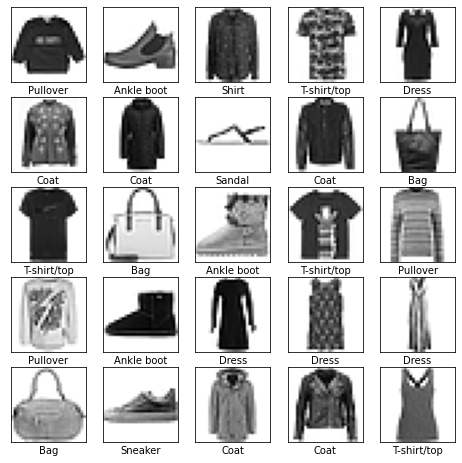

In [87]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
target = df_train[['label']].iloc[:, :]

plt.figure(figsize=(8,8))
# Show only the first 25 pictures
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(df_train.drop(['label'],axis=1).iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

In [88]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(df_train.shape[0]):
    # Extract the label for comparison
    if df_train['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif df_train['label'][i] == 1:
        results.append('Trouser')
    elif df_train['label'][i] == 2:
        results.append('Pullover')
    elif df_train['label'][i] == 3:
        results.append('Dress')
    elif df_train['label'][i] == 4:
        results.append('Coat')
    elif df_train['label'][i] == 5:
        results.append('Sandal')
    elif df_train['label'][i] == 6:
        results.append('Shirt')
    elif df_train['label'][i] == 7:
        results.append('Sneaker')
    elif df_train['label'][i] == 8:
        results.append('Bag')
    elif df_train['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
df_train['result'] = results

## ploting 2D & 3D graphs
#### In the plots it can be seen that even with only 2 or 3 features, there is a division of the labels.

In [89]:
features = ['pixel' + str(i+1) for i in range(784) ]
# Set first three principle components
pca3 = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca3.fit_transform(df_train[features].values)


In [90]:
df_train['1D'] = pca_result[:,0]
df_train['2D'] = pca_result[:,1] 
df_train['3D'] = pca_result[:,2]

In [91]:
df_train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...        43         0         0         0         0         0   
3       0  ...         0         1         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

        result           1D           2D          3D  
0     Pullover   940.014979  1264.934899  -13.064333  
1   Ankle boot -1115.990760   984.569964 -497.105346  
2        Shirt  1852.613740   400.032947  590.385865  
3  T-shirt/top   823.085923  -592.940376 -165.572176  
4        Dress  1057.325178 -1029.965513 -386.387881  

[5 rows x 789 columns]

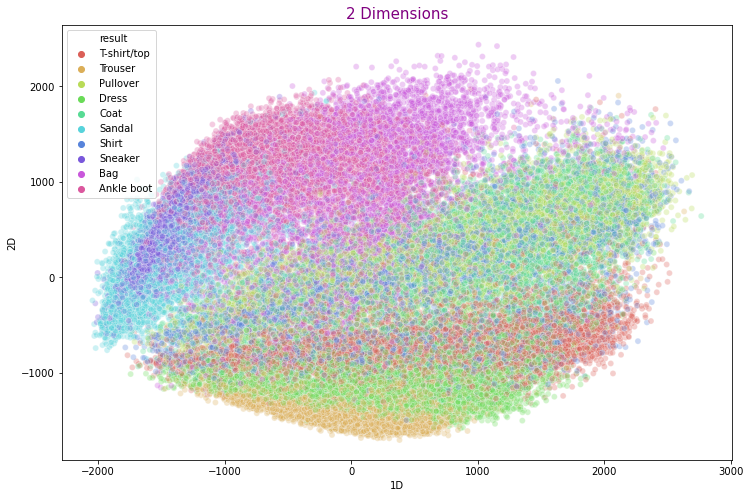

In [100]:
plt.figure(figsize=(12,8))
plt.title('2 Dimensions', fontdict= {'fontsize':15, 'color' : 'Purple'})
sns.scatterplot(
    x="1D", y="2D",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=df_train,
    legend="full",
    alpha=0.3
)

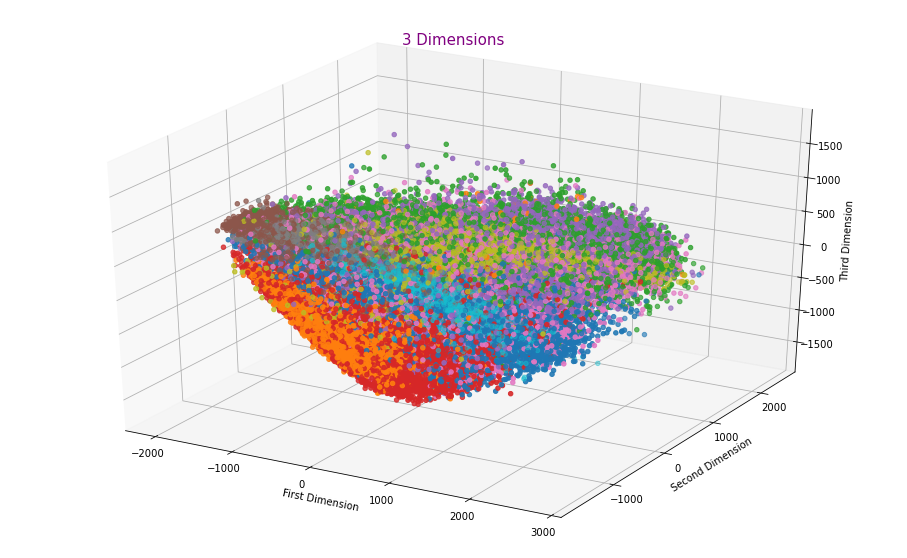

In [107]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
plt.title('3 Dimensions', fontdict= {'fontsize':15, 'color' : 'Purple'}, loc='center')
graph.scatter(
    xs=df_train["1D"], 
    ys=df_train["2D"], 
    zs=df_train["3D"], 
    c=df_train["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### Number of Fitures
The graph below shows the ideal amount of features for a particular accuracy, <br> We prefer to take the smallest number of features, which gives the highest accuracy. <br> the choosen number of fitures is 15, that gives 84% of accuracy.
   * original image: 785 = 28*28
   * new image: 16 = 4*4 <br>
   
*~ for visualization we will take 16 fitures, for models take 15 ~*

#### from the next graph and HeatMap, It can be concluded that low number of fitures are important to prediction. <br>therefore, we can take only 15 fitures.

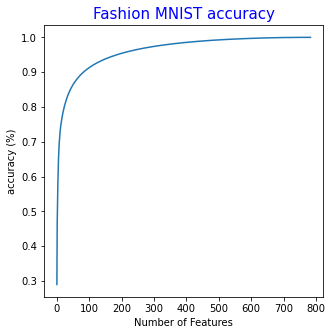

In [111]:
# fit the PCA with the training data
pca = PCA().fit(X_train)

# Plot the cumulative sum of eigenvalues
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('accuracy (%)') #for each component
plt.title('Fashion MNIST accuracy',fontdict= {'fontsize':15, 'color' : 'blue'} )
plt.show()

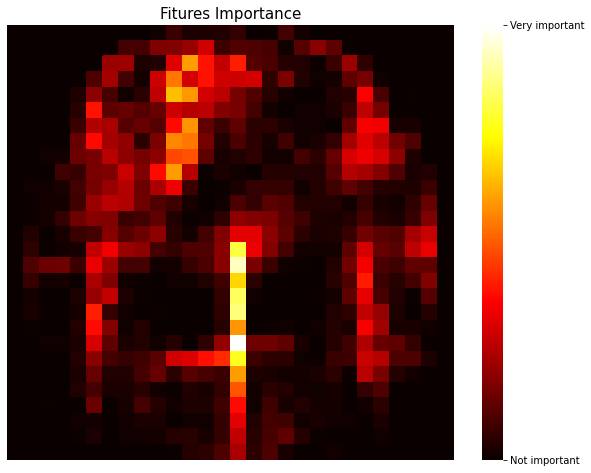

In [120]:
model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X_train, y_train)

importances = model.feature_importances_
pixels = np.reshape(importances,(28,28))

plt.figure(figsize= (10,8))
plot = sns.heatmap(pixels,cmap=plt.cm.hot)
plt.xticks([], [])
plot.set_yticks([])
plot.set_yticks([], minor=True)
colorbar = plot.collections[0].colorbar
colorbar.set_ticks([0,max(importances)])
colorbar.set_ticklabels(['Not important','Very important'])
plt.title('Fitures Importance',size = 15)
plt.show()

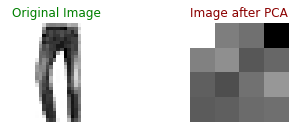

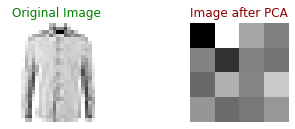

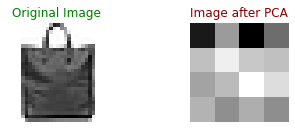

In [47]:
pca = PCA(n_components=16)
X_train_reduced = pca.fit_transform(X_train)

for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(4,4), cmap="gist_yarg")
    plt.title("Image after PCA", color = "Darkred")
    plt.axis("off")
    plt.show()
    

In [112]:
#pipeLine function: scale by StandardScaler, dimensionality reduction by PCA, call a model
def pipeLine(model):
    pipeline = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=15)),
                        ('mod', model)])
    return pipeline

In [113]:
#pipeline - fit & score
def pipe(model):
    p = pipeLine(model)
    p.fit(X_train, y_train)
    return round(p.score(X_test, y_test),4)

In [114]:
lr = pipe(LogisticRegression())
lr

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7829

In [117]:
dt = pipe(DecisionTreeClassifier())
dt

0.7609

In [117]:
rf = pipe(RandomForestClassifier())
rf

0.8441

In [118]:
knn = pipe(KNeighborsClassifier(n_neighbors=7))
knn

0.8348

In [112]:
ada = pipe(AdaBoostClassifier(random_state=70, n_estimators=200, learning_rate=0.2, algorithm='SAMME'))
ada

0.5505

In [121]:
pipe(XGBClassifier())

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8481

In [122]:
#voting
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('clf', VotingClassifier([
        ('rf', RandomForestClassifier()),
        ('knn',KNeighborsClassifier(n_neighbors=7)),
        ('xgb', XGBClassifier()),
        ('lr', LogisticRegression())],voting='soft')), ])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8491

In [125]:
#stacking
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('stack', StackingClassifier([
        ('rf', RandomForestClassifier()),    
        ('knn', KNeighborsClassifier(n_neighbors=7))]))])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8472

### explaination for choosing the number of features
Now let's look at an example of why we chose **15** features.<br>
We will examine the case with **80** features. <br> Note that the accuracy increased by 2%, even though the number of features increased more than 5 times.<br>
Therefore, we would prefer a slightly lower accuracy with a significantly smaller amount of features.

In [15]:
#pipeLine function: scale by StandardScaler, dimensionality reduction by PCA, call a model
def pipeLine80(model):
    pipeline = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=80)),
                        ('mod', model)])
    return pipeline

In [16]:
#pipeline - fit & score
def pipe80(model):
    p = pipeLine80(model)
    p.fit(X_train, y_train)
    return round(p.score(X_test, y_test),4)

In [17]:
rf = pipe80(RandomForestClassifier())
rf

0.8672

## *conclusions:*

*after dimensionality reduction with PCA, from **784** features to **15** features.*

### accuracy:
   * LogisticRegression: 0.7839
   * DecisionTreeClassifier: 0.7626
   * RandomForestClassifier: 0.8441
   
   
   ***ensemble models:***
   * xgb: 0.8481
   * adaBoost 0.5505
   * voting: 0.8491
   * stacking: 0.8472